In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pyplot as plt
import os
import sys
import h5py
import json

sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
from neurodsp import spectral
import neurodsp as ndsp

In [2]:
# load info file
infofile = '/Users/rgao/Documents/Data/CRCNS/hc3/sess_info.json'

# get info file
with open(infofile) as data_file:    
    info = json.load(data_file)
    
datafolder = '/Users/rgao/Documents/Data/CRCNS/hc3/'

### Traverse through data files and compute PSD & SCV

In [41]:
num_sesh = len(info['sess'])
for sesh in range(num_sesh):
    cur_dir = (datafolder+info['rat'][str(sesh)]+'/'+info['sess'][str(sesh)])    
    cur_sesh = info['rat'][str(sesh)]+'_'+info['sess'][str(sesh)]
    print(cur_sesh)
    
    # get sampling rate & number of shanks    
    fs = (float(info['Fs'][str(sesh)]))
    num_shanks = len(next(os.walk(cur_dir))[1])
    
    # initialize arrays for shank
    psdw_sh = np.zeros((num_shanks, int(fs/2+1))) # welch PSD
    psdm_sh = np.zeros((num_shanks, int(fs/2+1))) # median PSD
    scv_sh = np.zeros((num_shanks, int(fs/2+1)))  # SCV
    scv1p_sh = np.zeros((num_shanks, int(fs/2+1)))# SCV with 1% power outlier discarded
    scv5p_sh = np.zeros((num_shanks, int(fs/2+1)))# SCV with 5% power outlier discarded
    scv_tr = [[] for i in range(num_shanks)]
    
    # traverse through all shanks
    for sh in range(num_shanks):
        print(sh, end=',')
        datafile = (cur_dir+'/'+str(sh)+'/lfp0.mat')
        with h5py.File(datafile, 'r') as file:
            data = np.array(file['lfp'][:,0])
            # compute spectral measures
            freq, psdw_sh[sh,:] = spectral.psd(data, fs, method='mean', nperseg=int(fs), noverlap=int(fs/2))
            freq, psdm_sh[sh,:] = spectral.psd(data, fs, method='median', nperseg=int(fs), noverlap=int(fs/2))
            freq, scv_sh[sh,:] = spectral.scv(data,fs,nperseg=int(fs))
            freq, scv1p_sh[sh,:] = spectral.scv(data,fs,nperseg=int(fs),outlierpct=1.)
            freq, scv5p_sh[sh,:] = spectral.scv(data,fs,nperseg=int(fs),outlierpct=5.)
            freq, scv_T, scv_tr[sh] = spectral.scv_rs(data,fs,nperseg=int(fs), method='rolling')
    
    print('---')
    io.savemat(datafolder+'results/psdscv/'+str(sesh)+'_psdscv.mat', 
               {'sess_num':str(sesh), 
                'sess':cur_sesh, 
                'freq':freq, 
                'psdw':psdw_sh, 
                'psdm':psdm_sh,
                'scv':scv_sh, 
                'scv1p':scv1p_sh,
                'scv5p':scv5p_sh,
                'scv_tr':np.array(scv_tr),
                'scv_T': scv_T
               })    

ec013_ec013.426
0,1,2,3,4,5,6,7,---
ec013_ec013.482
0,1,2,3,4,5,6,7,---
ec013_ec013.658
0,1,2,3,4,5,6,7,---
ec014_ec014.183
0,1,2,3,4,5,6,7,8,9,10,11,---
ec014_ec014.277
0,1,2,3,4,5,6,7,8,9,10,11,---
ec014_ec014.440
0,1,2,3,4,5,6,7,8,9,10,11,12,---
ec016_ec016.397
0,1,2,3,4,5,6,7,8,9,10,11,---
ec016_ec016.499
0,1,2,3,4,5,6,7,8,9,10,11,---
ec016_ec016.582
0,1,2,3,4,5,6,7,8,9,10,11,---
f01_f01_maze08_MS.002
0,1,2,3,4,5,6,7,8,---
f01_f01_maze09_MS.002
0,1,2,3,4,5,6,7,8,---
f01_f01_maze11_MS.002
0,1,2,3,4,5,6,7,8,---
g01_g01_maze04_MS.002
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,---
g01_g01_maze05_MS.001
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,---
g01_g01_maze11_MS.002
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,---
gor01_2006-6-12_19-26-43
0,1,2,3,4,5,6,7,8,9,10,11,---
gor01_2006-6-13_15-44-7
0,1,2,3,4,5,6,7,8,9,10,11,---
gor01_2006-6-7_16-40-19
0,1,2,3,4,5,6,7,8,9,10,11,---
i01_i01_maze04_MS.003
0,1,2,3,4,5,6,7,8,9,10,11,12,---
i01_i01_maze05_MS.001
0,1,2,3,4,5,6,7,8,9,10,11,12,---
i01_i01_maze15_M

/Users/rgao/Documents/Code/research/neurodsp/neurodsp/spectral.py:129: RuntimeWarning: divide by zero encountered in log10
  outlieridx = np.argsort(np.mean(np.log10(spg), axis=0))[discard:-discard]


---
pin01_11-05_0-24-7
0,1,2,3,4,5,6,7,---
vvp01_2006-4-10_21-2-40
0,1,2,3,4,5,6,7,---
vvp01_2006-4-18_15-23-32
0,1,2,3,4,5,6,7,---
vvp01_2006-4-18_21-22-11
0,1,2,3,4,5,6,7,---


### surveying result

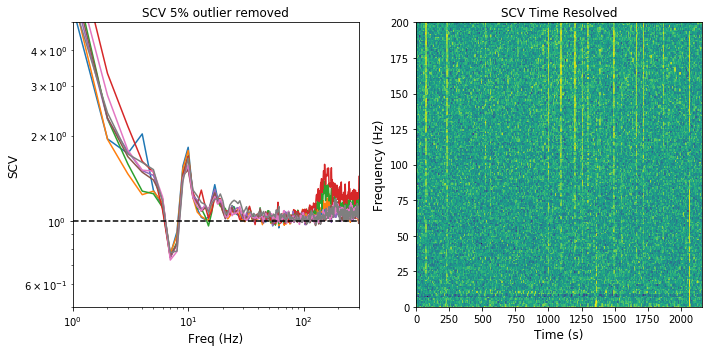

In [6]:
plt.style.use('paper')
sesh_id='1'
chan_id=1
data = io.loadmat(datafolder+'results/psdscv/'+ sesh_id +'_psdscv.mat', squeeze_me=True)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(data['freq'],data['scv5p'].T);
plt.loglog([1,500],[1,1], 'k--')
plt.xlim([1, 300])
plt.ylim([0.5, 5])
plt.xlabel('Freq (Hz)')
plt.ylabel('SCV')
plt.title('SCV 5% outlier removed')

plt.subplot(1,2,2)
plt.imshow(np.log10(data['scv_tr'][chan_id,:,:]), extent=[data['scv_T'][0],data['scv_T'][-1],data['freq'][-1],data['freq'][0]])
plt.ylim([0,200])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('SCV Time Resolved')

plt.tight_layout()